# Output Procurement

## Parameters

In [1]:
tickers = ["NZDUSD=X", "AUDUSD=X"]
strategy = "Strategy-1"

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

## Importing Predictors

In [3]:
predictors = []
for idx, ticker in enumerate(tickers):
    predictors.append(pd.read_csv('./' + ticker + '_input_signals.csv'))
predictors[0]

,Open,High,Low,Close,Adj Close,Volume,diff-day-1,diff-day-2,diff-day-3,diff-day-4,...,STD,RAW-EMA-2,RAW-EMA-3,RAW-EMA-5,RAW-EMA-7,RAW-EMA-21,RAW-EMA-50,bb_width,bb_buy,bb_sell
0,0.621504,0.623791,0.618506,0.619809,0.619809,0,-0.001695,-0.006208,-0.002933,-0.005777,...,0.002375,0.620780,0.621481,0.622113,0.622086,0.619511,0.620718,0.009498,-0.008072,-0.001426
1,0.619617,0.620001,0.614817,0.618582,0.618582,0,-0.001227,-0.002922,-0.007435,-0.004160,...,0.002571,0.619315,0.620032,0.620936,0.621210,0.619427,0.620634,0.010285,-0.008291,-0.001994
2,0.618697,0.620232,0.616105,0.619310,0.619310,0,0.000728,-0.000499,-0.002194,-0.006707,...,0.002666,0.619312,0.619671,0.620394,0.620735,0.619416,0.620582,0.010664,-0.007066,-0.003597
3,0.619195,0.621002,0.615915,0.620617,0.620617,0,0.001307,0.002035,0.000808,-0.000887,...,0.001016,0.620182,0.620144,0.620468,0.620705,0.619525,0.620583,0.004063,-0.001379,-0.002684
4,0.620617,0.622781,0.616599,0.622394,0.622394,0,0.001777,0.003084,0.003812,0.002585,...,0.001306,0.621656,0.621269,0.621110,0.621128,0.619786,0.620654,0.005225,-0.000361,-0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,0.704002,0.705430,0.702500,0.704052,0.704052,0,-0.000088,-0.003287,-0.003098,-0.002947,...,0.001506,0.704407,0.704694,0.704563,0.703852,0.695482,0.683325,0.006025,-0.004897,-0.001129
3718,0.704072,0.709512,0.703700,0.704072,0.704072,0,0.000020,-0.000068,-0.003267,-0.003078,...,0.001548,0.704184,0.704383,0.704399,0.703907,0.696263,0.684138,0.006191,-0.004374,-0.001817
3719,0.701740,0.708421,0.701538,0.701641,0.701641,0,-0.002430,-0.002411,-0.002499,-0.005697,...,0.001813,0.702489,0.703012,0.703480,0.703341,0.696752,0.684825,0.007251,-0.006233,-0.001018
3720,0.709280,0.711101,0.707559,0.709401,0.709401,0,0.007760,0.005329,0.005349,0.005261,...,0.002553,0.707097,0.706206,0.705454,0.704856,0.697902,0.685788,0.010210,-0.000365,-0.009845


## Utility

In [4]:
def smoothen(
    data,
    n:int=4,
):
    b = [1.0 / n] * n
    a = 1
    yy = lfilter(b, a, data)[n-1:]
    return yy

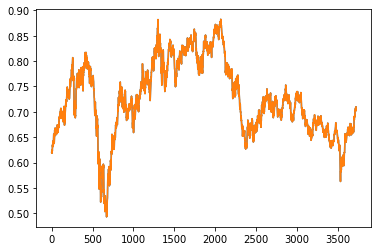

In [5]:
adj_close = predictors[0]["Adj Close"][:]
smooth_adj_close = smoothen(adj_close, 1)
plt.plot(adj_close)
plt.plot(smooth_adj_close)

In [6]:
def profit_calculator(
    buy_signals,
    sell_signals
):
    """
    Precondition : len(buy_signals) == len(sell_signals)
    """

    # Sanity Check
    assert len(buy_signals) == len(sell_signals)

    # Logic
    profit = 0

    for idx in range(len(buy_signals)):
        profit += adj_close[sell_signals[idx]] - adj_close[buy_signals[idx]]

    return profit

## Visualization Utility

In [7]:
def visualize_signals(
    price_points,
):
    pass

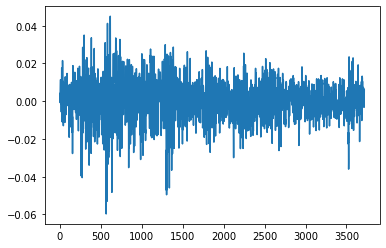

In [8]:
# Three Day Diff Non-Smoothened Version
three_day_diff = adj_close.to_numpy()[3:] - adj_close.to_numpy()[:-3]
np.insert(three_day_diff, 0, [np.nan]*3, axis=0)
plt.plot(three_day_diff)

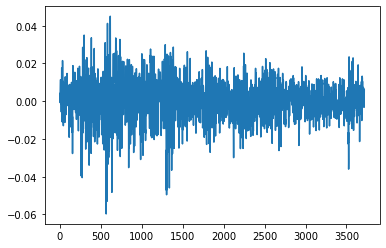

In [9]:
# Three Day Diff Smoothened Version
three_day_diff = smooth_adj_close[3:] - smooth_adj_close[:-3]
np.insert(three_day_diff, 0, [np.nan]*3, axis=0)
plt.plot(three_day_diff)

## Output Strategies
This section contains many strategies that can be used to generate a output.

### Strategy #0 - Good Feature

In [10]:
# Imports
from scipy.signal import find_peaks

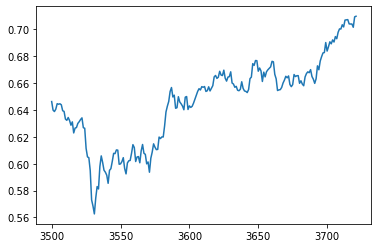

In [11]:
plt.plot(adj_close[3500:])

In [12]:
# Domain Rules
# We place a buy order iff we anticipate >= +0.02 increase
min_treshold = 0.02

In [13]:
# Finding Local Maxima and Minima
peaks, _ = find_peaks(adj_close, height=0)
throughs, _ = find_peaks(-adj_close)

In [14]:
len(throughs)

915

In [15]:
def viz_util(
    peaks,
    throughs,
    adj_close,
    window_start = 0,
    window_end = 20
):
    windowed_peaks = peaks[peaks < window_end]
    windowed_peaks = windowed_peaks[windowed_peaks >= window_start]
    windowed_throughs = throughs[throughs < window_end]
    windowed_throughs = windowed_throughs[windowed_throughs >= window_start]

    x = adj_close[window_start:window_end]
    plt.plot(x)
    plt.plot(windowed_peaks, x[windowed_peaks], "v")
    plt.plot(windowed_throughs, x[windowed_throughs], "^")


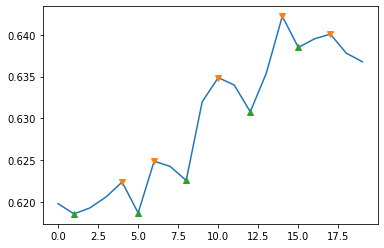

In [16]:
viz_util(
    peaks,
    throughs,
    adj_close,
    window_start = 0,
    window_end = 20
)

In [17]:
buy_points = list(throughs)
sell_points = list(peaks)

chosen_bps = []
chosen_sps = []

i = 0

sell_points.pop()

for idx in range(len(buy_points)):

    if len(buy_points) == 0 or len(sell_points) == 0:
        break

    bp = buy_points.pop()
    sp = sell_points.pop()

    if (adj_close[sp] - adj_close[bp]) > min_treshold:
        i+=1
        chosen_bps.append(bp)
        chosen_sps.append(sp)
print(i)

144


In [18]:
len(chosen_bps)

144

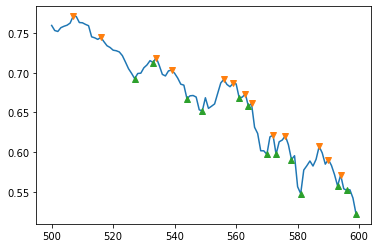

In [19]:
viz_util(
    np.array(chosen_sps),
    np.array(chosen_bps),
    adj_close,
    window_start = 500,
    window_end = 600
)

### Strategy #1 - Maximize Profits + Filtering

#### Algorithm

In [20]:
def strategy_1():
    pass

In [21]:
# Function to find the maximum profit earned by buying and
# selling shares any number of times
def findMaxProfit(price):

    buy_points = []
    sell_points = []
    profit_txs = []
    cycles = 0

    # keep track of the maximum profit gained
    profit = 0

    # initialize the local minimum to the first element's index
    j = 0

    # start from the second element
    for i in range(1, len(price)):
        # update the local minimum if a decreasing sequence is found
        if price[i - 1] > price[i]:
            j = i
        # sell shares if the current element is the peak, i.e.,
        # (`previous <= current > next`)
        if price[i - 1] <= price[i] and (i + 1 == len(price) or price[i] > price[i + 1]):
            tx_profit = (price[i] - price[j])
            profit += tx_profit
            buy_points.append(j)
            sell_points.append(i)
            profit_txs.append(tx_profit)
            cycles += 1
            # print(f"Buy on day {j} and sell on day {i}")

    return buy_points, sell_points, cycles, profit_txs

In [22]:
price = list(adj_close)
buy_points, sell_points, cycles, profit_txs = findMaxProfit(price)
profit = profit_calculator(buy_points, sell_points)
print("\nTotal profit : ", profit)
print("\nTotal cycles : ", cycles)
print("\nPips Gained : ", profit*1000)


Total profit :  7.980222821235657

Total cycles :  918

Pips Gained :  7980.222821235657


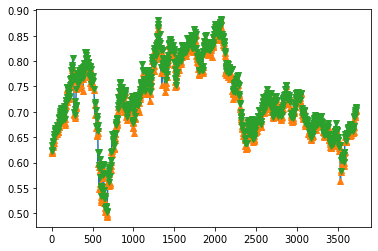

In [23]:
# Visualization
plt.plot(adj_close)
plt.plot(buy_points, adj_close[buy_points], "^")
plt.plot(sell_points, adj_close[sell_points], "v")

#### Merging 2 continuous buy sell trades

In [24]:
# Calculating the percentage of continuous points
last_sp = None
total_points = len(buy_points)
total_cts_points = 0
for idx in range(total_points):
    bp = buy_points[idx]
    sp = sell_points[idx]
    print(str(bp) + " :: " + str(sp))
    if last_sp is not None and last_sp+1 == bp:
        total_cts_points += 1
    last_sp = sp

percentage_cts_points = (total_cts_points/total_points)*100
print("Percentage of cts_points : "  + str(percentage_cts_points) + "%")

1 :: 4
5 :: 6
8 :: 10
12 :: 14
15 :: 17
20 :: 25
28 :: 29
31 :: 37
39 :: 40
41 :: 42
46 :: 47
48 :: 50
52 :: 53
56 :: 60
64 :: 70
72 :: 73
75 :: 76
77 :: 78
79 :: 84
85 :: 86
87 :: 88
89 :: 92
94 :: 95
96 :: 99
100 :: 103
104 :: 107
108 :: 110
111 :: 113
116 :: 118
119 :: 122
123 :: 128
130 :: 131
133 :: 134
136 :: 137
138 :: 139
142 :: 149
150 :: 152
153 :: 154
157 :: 158
159 :: 162
163 :: 172
174 :: 177
178 :: 180
182 :: 183
184 :: 189
190 :: 191
193 :: 194
195 :: 196
201 :: 202
205 :: 208
210 :: 212
213 :: 214
215 :: 216
218 :: 224
225 :: 226
228 :: 231
232 :: 236
237 :: 238
239 :: 242
243 :: 246
248 :: 250
251 :: 252
253 :: 257
261 :: 262
263 :: 265
266 :: 267
268 :: 269
275 :: 277
278 :: 281
283 :: 284
289 :: 290
291 :: 293
294 :: 295
296 :: 301
303 :: 306
308 :: 310
311 :: 312
313 :: 315
317 :: 319
320 :: 322
323 :: 326
327 :: 328
329 :: 332
333 :: 334
336 :: 337
341 :: 342
343 :: 348
351 :: 353
354 :: 355
356 :: 357
360 :: 364
365 :: 368
369 :: 371
373 :: 377
378 :: 379
384 :: 3

In [25]:
# Merging continuous points
total_points = len(buy_points)

continuos_sets = []
ongoing_set = []
prev_sell_point = None

for idx in range(total_points):
    bp = buy_points[idx]
    sp = sell_points[idx]

    if prev_sell_point is not None:
        if (prev_sell_point+1 != bp):
            continuos_sets.append(ongoing_set)
            ongoing_set = []

    ongoing_set.append(idx)
    prev_sell_point = sp
continuos_sets.append(ongoing_set)

In [26]:
continuos_sets

[[0, 1],
 [2],
 [3, 4],
 [5],
 [6],
 [7],
 [8, 9],
 [10, 11],
 [12],
 [13],
 [14],
 [15],
 [16, 17, 18, 19, 20, 21],
 [22, 23, 24, 25, 26, 27],
 [28, 29, 30],
 [31],
 [32],
 [33, 34],
 [35, 36, 37],
 [38, 39, 40],
 [41, 42],
 [43, 44, 45],
 [46, 47],
 [48],
 [49],
 [50, 51, 52],
 [53, 54],
 [55, 56, 57, 58, 59],
 [60, 61, 62],
 [63, 64, 65, 66],
 [67, 68],
 [69],
 [70, 71, 72, 73],
 [74],
 [75, 76, 77],
 [78, 79, 80, 81, 82, 83],
 [84],
 [85, 86],
 [87, 88, 89],
 [90, 91, 92],
 [93, 94],
 [95, 96, 97],
 [98],
 [99, 100, 101],
 [102, 103],
 [104],
 [105],
 [106, 107],
 [108, 109, 110],
 [111],
 [112],
 [113, 114, 115],
 [116],
 [117, 118, 119],
 [120],
 [121],
 [122],
 [123, 124],
 [125],
 [126],
 [127],
 [128],
 [129, 130],
 [131],
 [132],
 [133, 134],
 [135],
 [136, 137],
 [138, 139],
 [140],
 [141, 142],
 [143],
 [144],
 [145],
 [146, 147],
 [148, 149, 150, 151],
 [152, 153, 154, 155],
 [156],
 [157, 158],
 [159, 160],
 [161, 162, 163],
 [164, 165, 166, 167],
 [168],
 [169, 170],
 [1

In [27]:
new_buy_points = []
new_sell_points = []
set_count = len(continuos_sets)

for idx in range(set_count):
    curr_set = continuos_sets[idx]
    curr_set_length = len(curr_set)
    if curr_set_length == 1: # Only 1 point so just pass that through
        new_buy_points.append(buy_points[curr_set[0]])
        new_sell_points.append(sell_points[curr_set[0]])
    else: # Multiple points so buy at idx 0 and sell at last idx
        new_buy_points.append(buy_points[curr_set[0]])
        new_sell_points.append(sell_points[curr_set[curr_set_length-1]])

In [28]:
def print_buy_sell_pairs(buy_points, sell_points):
    new_points_length = len(buy_points)
    for idx in range(new_points_length):
        print("Buy : " + str(buy_points[idx]) + " :: Sell : " + str(sell_points[idx]))
print_buy_sell_pairs(new_buy_points, new_sell_points)

Buy : 1 :: Sell : 6
Buy : 8 :: Sell : 10
Buy : 12 :: Sell : 17
Buy : 20 :: Sell : 25
Buy : 28 :: Sell : 29
Buy : 31 :: Sell : 37
Buy : 39 :: Sell : 42
Buy : 46 :: Sell : 50
Buy : 52 :: Sell : 53
Buy : 56 :: Sell : 60
Buy : 64 :: Sell : 70
Buy : 72 :: Sell : 73
Buy : 75 :: Sell : 92
Buy : 94 :: Sell : 113
Buy : 116 :: Sell : 128
Buy : 130 :: Sell : 131
Buy : 133 :: Sell : 134
Buy : 136 :: Sell : 139
Buy : 142 :: Sell : 154
Buy : 157 :: Sell : 172
Buy : 174 :: Sell : 180
Buy : 182 :: Sell : 191
Buy : 193 :: Sell : 196
Buy : 201 :: Sell : 202
Buy : 205 :: Sell : 208
Buy : 210 :: Sell : 216
Buy : 218 :: Sell : 226
Buy : 228 :: Sell : 246
Buy : 248 :: Sell : 257
Buy : 261 :: Sell : 269
Buy : 275 :: Sell : 281
Buy : 283 :: Sell : 284
Buy : 289 :: Sell : 301
Buy : 303 :: Sell : 306
Buy : 308 :: Sell : 315
Buy : 317 :: Sell : 334
Buy : 336 :: Sell : 337
Buy : 341 :: Sell : 348
Buy : 351 :: Sell : 357
Buy : 360 :: Sell : 371
Buy : 373 :: Sell : 379
Buy : 384 :: Sell : 389
Buy : 391 :: Sell : 39

In [29]:
# Overwrite old buy and sell points
buy_points = new_buy_points
sell_points = new_sell_points

In [30]:
profit = profit_calculator(buy_points, sell_points)
print("\nTotal profit : ", profit)
print("\nTotal cycles : ", len(buy_points))
print("\nPips Gained : ", profit*1000)


Total profit :  6.030767053365707

Total cycles :  450

Pips Gained :  6030.767053365707


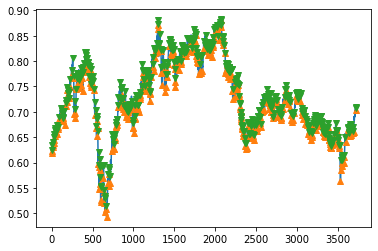

In [31]:
# Visualization
plt.plot(adj_close)
plt.plot(buy_points, adj_close[buy_points], "^")
plt.plot(sell_points, adj_close[sell_points], "v")

#### Removing buy sell pairs that immediately buy and sell
These are bad points because buying the first day and selling right after is almost always a bad idea!

In [32]:
buy_sell_pair_length = len(buy_points)

new_buy_points = []
new_sell_points = []

for idx in range(buy_sell_pair_length):
    if buy_points[idx]+1 != sell_points[idx]:
        new_buy_points.append(buy_points[idx])
        new_sell_points.append(sell_points[idx])

In [33]:
# Overwrite old buy and sell points
buy_points = new_buy_points
sell_points = new_sell_points

In [34]:
profit = profit_calculator(buy_points, sell_points)
print("\nTotal profit : ", profit)
print("\nTotal cycles : ", len(buy_points))
print("\nPips Gained : ", profit*1000)


Total profit :  5.614503592252731

Total cycles :  349

Pips Gained :  5614.503592252731


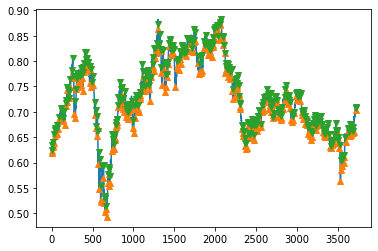

In [35]:
# Visualization
plt.plot(adj_close)
plt.plot(buy_points, adj_close[buy_points], "^")
plt.plot(sell_points, adj_close[sell_points], "v")

#### Pick a better buy point
In between 2 sell points get the list of all buy points. Replace the current buy point in between with the lowest point.

In [36]:
def pick_a_better_buy_point(buy_points, sell_points, adj_close):
    new_buy_points = [buy_points[0]]
    for idx in range(len(sell_points)-1):
        sp_1 = sell_points[idx]
        sp_2 = sell_points[idx+1]
        possible_mins = adj_close[sp_1+1:sp_2]
        best_buy_point = np.argmin(possible_mins)
        new_buy_points.append(sp_1 + best_buy_point + 1)
    return new_buy_points

new_buy_points = pick_a_better_buy_point(buy_points, sell_points, adj_close)

In [37]:
print("Old Buy Points : " + str(buy_points))
print("New Buy Points : " + str(new_buy_points))

Old Buy Points : [1, 8, 12, 20, 31, 39, 46, 56, 64, 75, 94, 116, 136, 142, 157, 174, 182, 193, 205, 210, 218, 228, 248, 261, 275, 289, 303, 308, 317, 341, 351, 360, 373, 384, 391, 395, 413, 419, 428, 434, 447, 452, 464, 475, 486, 502, 527, 537, 544, 549, 561, 570, 581, 599, 606, 622, 642, 651, 662, 671, 692, 697, 706, 712, 741, 747, 759, 763, 770, 778, 784, 791, 798, 803, 815, 819, 843, 849, 854, 860, 872, 882, 910, 914, 924, 929, 934, 939, 948, 956, 965, 969, 993, 1001, 1021, 1031, 1038, 1052, 1059, 1063, 1075, 1080, 1085, 1104, 1118, 1128, 1134, 1139, 1155, 1165, 1171, 1176, 1183, 1189, 1204, 1218, 1239, 1246, 1259, 1269, 1287, 1302, 1315, 1319, 1327, 1333, 1340, 1346, 1368, 1383, 1398, 1408, 1415, 1420, 1440, 1448, 1457, 1469, 1474, 1479, 1489, 1513, 1536, 1547, 1557, 1572, 1587, 1596, 1602, 1608, 1615, 1620, 1634, 1638, 1650, 1668, 1686, 1691, 1699, 1715, 1723, 1734, 1740, 1750, 1783, 1797, 1811, 1825, 1840, 1862, 1873, 1887, 1894, 1908, 1918, 1929, 1933, 1938, 1942, 1955, 1967, 19

In [38]:
# Overwrite old buy
buy_points = new_buy_points

In [39]:
profit = profit_calculator(buy_points, sell_points)
print("\nTotal profit : ", profit)
print("\nTotal cycles : ", len(buy_points))
print("\nPips Gained : ", profit*1000)


Total profit :  5.981552213430405

Total cycles :  349

Pips Gained :  5981.552213430405


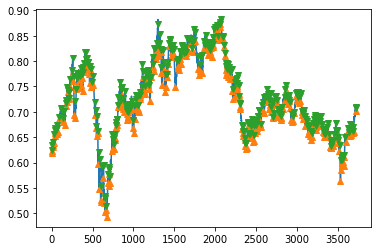

In [40]:
# Visualization
plt.plot(adj_close)
plt.plot(buy_points, adj_close[buy_points], "^")
plt.plot(sell_points, adj_close[sell_points], "v")

#### Pick a better sell point
In between 2 buy points get the list of all sell points. Replace the current sell point in between with the lowest point.

In [ ]:
def pick_a_better_sell_point(buy_points, sell_points, adj_close):
    new_sell_points = []
    for idx in range(len(buy_points)-1):
        bp_1 = buy_points[idx]
        bp_2 = buy_points[idx+1]
        possible_maxs = adj_close[bp_1+1:bp_2]
        best_sell_point = np.argmax(possible_maxs)
        new_sell_points.append(bp_1 + best_sell_point + 1)
    new_sell_points.append(sell_points[len(sell_points)-1])
    return new_sell_points
new_sell_points = pick_a_better_sell_point(buy_points, sell_points, adj_close)

In [ ]:
print("Old Sell Points : " + str(sell_points))
print("New Sell Points : " + str(new_sell_points))

In [ ]:
# Overwrite old buy
sell_points = new_sell_points

In [ ]:
profit = profit_calculator(buy_points, sell_points)
print("\nTotal profit : ", profit)
print("\nTotal cycles : ", len(buy_points))
print("\nPips Gained : ", profit*1000)

In [ ]:
# Visualization
plt.plot(adj_close)
plt.plot(buy_points, adj_close[buy_points], "^")
plt.plot(sell_points, adj_close[sell_points], "v")

In [ ]:
bpa = np.array(buy_points)
bpc = bpa[bpa<200]

spa = np.array(sell_points)
spc = spa[spa<200]

In [ ]:
# Visualization
plt.plot(adj_close[:200])
plt.plot(bpc, adj_close[bpc], "^")
plt.plot(spc, adj_close[spc], "v")

In [ ]:
print_buy_sell_pairs(buy_points, sell_points)

#### Visualization

In [ ]:
visualize_signals(
    strategy_1()
)

### Constant

In [ ]:
strategies = {
    "Strategy-1": strategy_1()
}

## Exporting Signals

In [ ]:
buy_signal = np.zeros(len(adj_close))
buy_signal[buy_points] = 1
buy_signal = buy_signal.astype(int)
percentage_of_buy_signals = (sum(buy_signal)/len(adj_close))*100
print("Percentage of buy signals + " + str(percentage_of_buy_signals) + "%")

In [ ]:
sell_signal = np.zeros(len(adj_close))
sell_signal[sell_points] = 1
sell_signal = sell_signal.astype(int)
percentage_of_sell_signals = (sum(sell_signal)/len(adj_close))*100
print("Percentage of sell signals + " + str(percentage_of_sell_signals) + "%")

In [ ]:
buy_signal

In [ ]:
len(buy_points)+len(sell_points)

In [ ]:
pd.DataFrame(buy_signal).to_csv(
    r'./' + tickers[0] + '_output_signals_buy.csv',
    index=False,
    header=True
)

pd.DataFrame(sell_signal).to_csv(
    r'./' + tickers[0] + '_output_signals_sell.csv',
    index=False,
    header=True
)

## Exporting Signals for Custom Loss Function

In [ ]:
pd.DataFrame(buy_signal).to_csv(
    r'./' + tickers[0] + '_clf_output_signals.csv',
    index=False,
    header=True
)

pd.DataFrame(buy_points).to_csv(
    r'./' + tickers[0] + '_clf_buy_points.csv',
    index=False,
    header=True
)

pd.DataFrame(sell_points).to_csv(
    r'./' + tickers[0] + '_clf_sell_points.csv',
    index=False,
    header=True
)